Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
b. What metric would you report for this dataset?
c. What is its value?


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Since we a getting $3145.13 as AOV, we want to do a bit of mannual inspection of the data set (first 100 rows) first: 

In [2]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
print(df.shape)

(5000, 7)


In [3]:
pd.set_option('display.max_rows', 100)
df.head(100)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


As we can see, there's a total number of 5000 orders. And from our manual inspection of fisrt 100 rows of the data set, we see most orders are under $500 but there are some orders with abnormal order_amount. For example, both order 16 and 607 have order_amount $704000 and total_items of 2000 pairs of sneakers.

So my guess is the orders which comes with huge order_amount (since they are ordering a huge amounts of sneakers in 1 order) boosted the our metric (AOV) of the data set. I'll plot a histogram to confirm this.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89be2e9410>]],
      dtype=object)

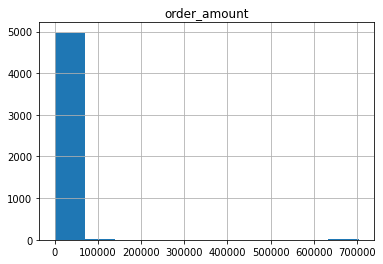

In [4]:
df.hist(column='order_amount')

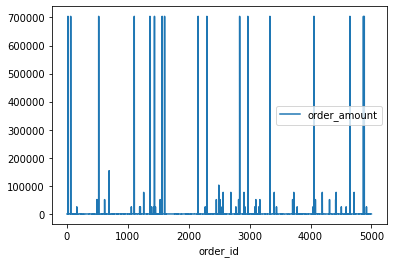

In [5]:
df.plot.line(x='order_id',y='order_amount')

In [6]:
df_sorted = df.sort_values(by='order_amount', ascending=False)
df_sorted.head(100)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


As we can see in the histogram, there are only 3 bins where most of the orders are low in order_amount. 2 very small bins are centered around $100000 and $700000. In the line plot, those bins corresponds to the spikes in y-axis. We then sorted the dataset in a descending order in terms of order_amount and displayed the first 100 orders. We can see only a handful of orders have order_amount bigger than $2000 but their order_amount comes in very huge number which influenced calculated AOV. 

Therefore, I don't think average order value is a good metric on this dataset. Since from above inspections, we have orders that have both very high order_amount and total_items and orders that have only high order_amount but very low total_items.
Also, since we know the 100 shops are only sell one model of shoe, the orders that have only high order_amount but low total_items are likely being errors in recording. I'll print those orders below.

In [7]:
df_error = df.loc[(df['order_amount'] >= 2000) &
              (df['total_items']<=10)]
df_error.head(100)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20


In terms of this dataset where every shop only sell one model of the shoe, if we can confirm that the above orders are errors in recording, then average order price of 1 pair of sneakers (sum of total_amount/total_items then divided by total number of orders) would be a better metric. I'll output it below:

In [8]:
df_corrected = pd.merge(df,df_error, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
average_shoe_price = (df_corrected['order_amount']/df_corrected['total_items']).sum()/df_corrected.shape[0]
print(average_shoe_price)

152.47557529269278


The average order price of 1 pair of sneakers on corrected dataset is $152.48. If we can't confirm the error and don't correct the dataset, then the value would be:

In [9]:
average_shoe_price_uncorrected = (df['order_amount']/df['total_items']).sum()/df.shape[0]
print(average_shoe_price_uncorrected)

387.7428


A better metric on the uncorrected dataset would be the standard deviation of the average order price of 1 pair of sneakers as it at least shows us how concentrated the order prices of 1 pair of sneakers are (hopefully we'll see there's a huge deviation and know there's something wrong with the data recodring). I'll output it below:

In [10]:
std_shoe_price_uncorrected = (df['order_amount']/df['total_items']).std()
print(std_shoe_price_uncorrected)

2441.963725368451


I'll output the std of the corrected set to show there's error in the recording since each shop are only selling the same model thus the order price of 1 pair should be close:

In [11]:
std_shoe_price = (df_corrected['order_amount']/df_corrected['total_items']).std()
print(std_shoe_price)

31.26021753289636


Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

How many orders were shipped by Speedy Express in total?
What is the last name of the employee with the most orders?
What product was ordered the most by customers in Germany?


a. SELECT COUNT(OrderID) FROM Orders WHERE ShipperID = (SELECT ShipperID FROM Shippers WHERE ShipperName = 'Speedy Express'); 

Total number is 54.

b. SELECT LastName FROM Employees WHERE EmployeeID = 
    (SELECT TOP 1 EmployeeID FROM Orders GROUP BY EmployeeID ORDER BY count(EmployeeID) DESC)

Her last name is Peacock.

c. 
SELECT ProductName FROM Products 
WHERE ProductID=
    (SELECT TOP 1 ProductID
    FROM
        (SELECT
              OrderDetails.ProductID, OrderDetails.Quantity
        FROM   OrderDetails
        LEFT JOIN   
            (SELECT Orders.OrderID
            FROM Orders 
            INNER JOIN Customers 
            ON Orders.CustomerID=Customers.CustomerID 
            WHERE Country = 'Germany') temp
        ON  OrderDetails.OrderID=temp.OrderID)
    GROUP BY ProductID 
    ORDER BY sum(Quantity) DESC)

The most ordered product by German customers is Gorgonzola Telino.